# 19. 토픽 모델링 Topic Modeling

### 1) 잠재 의미 분석 Latent Semantic Analysis, LSA

토픽 모델링에 아이디어를 제공한 알고리즘

BoW에 기반한 DTM이나 TF-IDF는 단어의 의미(토픽)를 고려하지 못하기 때문에, 이에 대한 대안으로 **잠재 의미 분석**이 제시되었다.

1. 특이값 분해 SVD

  : A가 m * n 행렬일때, A = UΣV^T와 같이 3개의 행렬 곱으로 분해하는 것

  (U : m * m 직교 행렬, V : n * n 직교 행렬, Σ : m * n 직사각 대각행렬)

- 전치 행렬 : 원래 행렬에서 행과 열을 바꾼 행렬 M^T

- 단위 행렬 : 주대각선 원소가 모두 1이며 나머지 원소는 모두 0인 정사각 행렬 I

- 역행렬 : A^T, A * A^-1 = I

- 직교 행렬 : A * A^T = I, A^T * A = I

- 대각 행렬 : 대각선을 제외한 모든 부분의 원소가 0인 행렬

2. 절단된 SVD

  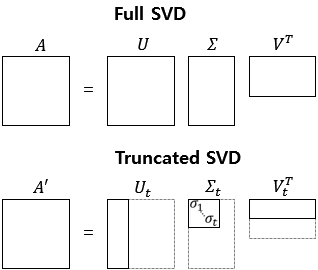

  절단된 SVD는 대각 행렬 Σ의 대각 원소 값 중 상위 t개만 남긴다. (t는 하이퍼 파라미터 -> t를 크게 잡으면 기존 행렬 A로부터 다양한 의미를 가져갈 수 있지만, 작게 잡으면 노이즈 제거 가능)

  -> 데이터의 차원을 줄인다.

3. 잠재 의미 분석 LSA

4. 실습을 통한 이해 (뉴스 그룹 데이터)







In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())
# NLTK로부터 불용어를 받아온다.
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
# 역토큰화 (토큰화 작업을 역으로 되돌림)
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

# TF-IDF 행렬 생성
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, # 상위 1,000개의 단어를 보존 
max_df = 0.5, smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

In [6]:
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122) # 토픽 20개
svd_model.fit(X)

terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('like', 0.21386), ('know', 0.20046), ('people', 0.19293), ('think', 0.17805), ('good', 0.15128)]
Topic 2: [('thanks', 0.32888), ('windows', 0.29088), ('card', 0.18069), ('drive', 0.17455), ('mail', 0.15111)]
Topic 3: [('game', 0.37064), ('team', 0.32443), ('year', 0.28154), ('games', 0.2537), ('season', 0.18419)]
Topic 4: [('drive', 0.53324), ('scsi', 0.20165), ('hard', 0.15628), ('disk', 0.15578), ('card', 0.13994)]
Topic 5: [('windows', 0.40399), ('file', 0.25436), ('window', 0.18044), ('files', 0.16078), ('program', 0.13894)]
Topic 6: [('chip', 0.16114), ('government', 0.16009), ('mail', 0.15625), ('space', 0.1507), ('information', 0.13562)]
Topic 7: [('like', 0.67086), ('bike', 0.14236), ('chip', 0.11169), ('know', 0.11139), ('sounds', 0.10371)]
Topic 8: [('card', 0.46633), ('video', 0.22137), ('sale', 0.21266), ('monitor', 0.15463), ('offer', 0.14643)]
Topic 9: [('know', 0.46047), ('card', 0.33605), ('chip', 0.17558), ('government', 0.1522), ('video', 0.14356)]
Topic 10

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### 2) 잠재 디리클레 할당 LDA

: 문서 집합에서 토픽을 찾아내는 토픽 모델링의 대표적인 알고리즘

1. 잠재 디리클레 할당 LDA

  빈도수 기반 표현 방법인 BoW 행렬 DTM 이나 TF-IDF 행렬을 입력으로하여, 단어의 순서를 신경쓰지 않는다.

- 문서에 사용할 단어의 개수 N 지정

- 모든 단어를 N개 중 하나의 토픽에 할당

- 모든 문서의 모든 단어에 대해 아래 사항 반복

  - 토픽 재할당

  - 선택한 토픽에서 단어의 출현 확률 분포에 기반해 문서에 사용할 단어 선택

2. LDA와 LSA 차이

  LSA : DTM을 차원 축소 하여 축소 차원에서 근접 단어들을 토픽으로 묶음

  LDA : 단어가 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합확률로 추정하여 토픽을 추출

3. 실습을 통한 이해

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=20,learning_method='online',random_state=777,max_iter=1)
lda_top = lda_model.fit_transform(X)

In [10]:
# 단어 집합. 1,000개의 단어가 저장됨.
terms = vectorizer.get_feature_names()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_,terms)

Topic 1: [('encryption', 25.35), ('phone', 25.09), ('clinton', 24.76), ('president', 23.55), ('government', 22.01)]
Topic 2: [('chip', 36.07), ('chips', 29.16), ('keys', 23.78), ('algorithm', 23.36), ('clipper', 21.03)]
Topic 3: [('thanks', 88.37), ('mail', 76.51), ('information', 54.19), ('address', 53.43), ('looking', 51.7)]
Topic 4: [('year', 96.26), ('like', 94.4), ('good', 82.64), ('think', 78.1), ('team', 76.28)]
Topic 5: [('printer', 26.47), ('print', 21.63), ('dave', 17.52), ('fonts', 17.14), ('david', 16.23)]
Topic 6: [('game', 23.7), ('baseball', 19.07), ('mark', 13.91), ('window', 13.76), ('exactly', 11.24)]
Topic 7: [('drive', 83.09), ('drives', 37.15), ('armenians', 31.57), ('armenian', 30.41), ('controller', 29.94)]
Topic 8: [('thanks', 14.73), ('font', 12.55), ('know', 10.62), ('thought', 10.16), ('value', 9.14)]
Topic 9: [('israel', 60.14), ('israeli', 41.3), ('jews', 27.89), ('jewish', 27.24), ('arab', 26.58)]
Topic 10: [('people', 199.61), ('think', 129.74), ('like', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### 5) 한국어 키버트 keyBERT를 이용한 키워드 추출


In [11]:
!pip install sentence_transformers
!pip install konlpy

     |████████████████████████████████| 79 kB 3.4 MB/s 
     |████████████████████████████████| 3.8 MB 35.8 MB/s 
     |████████████████████████████████| 1.2 MB 37.5 MB/s 
     |████████████████████████████████| 67 kB 3.8 MB/s 
     |████████████████████████████████| 895 kB 69.1 MB/s 
     |████████████████████████████████| 596 kB 64.9 MB/s 
     |████████████████████████████████| 6.5 MB 41.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=4701fc732544cfda3316c2186e62691e4d74c69b8ac6210efc0792aa100fa9dc
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 65.9 MB/s 


In [12]:
import numpy as np
import itertools

from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

doc = """
드론 활용 범위도 점차 확대되고 있다. 최근에는 미세먼지 관리에 드론이 활용되고 있다.
서울시는 '미세먼지 계절관리제' 기간인 지난달부터 오는 3월까지 4개월간 드론에 측정장치를 달아 미세먼지 집중 관리를 실시하고 있다.
드론은 산업단지와 사업장 밀집지역을 날아다니며 미세먼지 배출 수치를 점검하고, 현장 모습을 영상으로 담는다.
영상을 통해 미세먼지 방지 시설을 제대로 가동하지 않는 업체와 무허가 시설에 대한 단속이 한층 수월해질 전망이다.
드론 활용에 가장 적극적인 소방청은 광범위하고 복합적인 재난 대응 차원에서 드론과 관련 전문인력 보강을 꾸준히 이어가고 있다.
지난해 말 기준 소방청이 보유한 드론은 총 304대, 드론 조종 자격증을 갖춘 소방대원의 경우 1,860명이다.
이 중 실기평가지도 자격증까지 갖춘 ‘드론 전문가’ 21명도 배치돼 있다.
소방청 관계자는 "소방드론은 재난현장에서 영상정보를 수집, 산악ㆍ수난 사고 시 인명수색·구조활동,
유독가스·폭발사고 시 대원안전 확보 등에 활용된다"며
"향후 화재진압, 인명구조 등에도 드론을 활용하기 위해 연구개발(R&D)을 하고 있다"고 말했다.
"""

In [13]:
okt = Okt()

tokenized_doc = okt.pos(doc)
tokenized_nouns = ' '.join([word[0] for word in tokenized_doc if word[1] == 'Noun'])

print('품사 태깅 10개만 출력 :',tokenized_doc[:10])
print('명사 추출 :',tokenized_nouns)

품사 태깅 10개만 출력 : [('\n', 'Foreign'), ('드론', 'Noun'), ('활용', 'Noun'), ('범위', 'Noun'), ('도', 'Josa'), ('점차', 'Noun'), ('확대', 'Noun'), ('되고', 'Verb'), ('있다', 'Adjective'), ('.', 'Punctuation')]
명사 추출 : 드론 활용 범위 점차 확대 최근 미세먼지 관리 드론 활용 서울시 미세먼지 계절 관리제 기간 지난달 개 월간 드론 측정 장치 달 미세먼지 집중 관리 실시 드론 산업 단지 사업 밀집 지역 미세먼지 배출 수치 점검 현장 모습 영상 영상 통해 미세먼지 방지 시설 제대로 가동 업체 무허가 시설 대한 단속 한층 전망 드론 활용 가장 적극 소방청 복합 재난 대응 차원 드론 관련 전문 인력 보강 어가 지난해 말 기준 소방청 보유 드론 총 드론 조종 자격증 소방대 경우 명 이 중 실기 평가 지도 자격증 드론 전문가 명도 배치 소방청 관계자 소방 드론 재난 현장 영상 정보 수집 산악 수난 사고 시 인명 수색 구조 활동 유독가스 폭발사고 시 대원 안전 확보 등 활용 며 향후 화재 진압 인명구조 등 드론 활용 위해 연구개발 고 말


In [14]:
n_gram_range = (2, 3)

count = CountVectorizer(ngram_range=n_gram_range).fit([tokenized_nouns])
candidates = count.get_feature_names_out() # 단어 추출

In [15]:
model = SentenceTransformer('sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens')
doc_embedding = model.encode([doc])
candidate_embeddings = model.encode(candidates)

Downloading:   0%|          | 0.00/574 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.06k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/731 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/527 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [16]:
top_n = 5
distances = cosine_similarity(doc_embedding, candidate_embeddings)
keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]
print(keywords)

['드론 산업', '드론 드론 조종', '실시 드론 산업', '관리 드론 활용', '미세먼지 관리 드론']


In [17]:
# 다양한 키워드를 얻기 위한 알고리즘
# 1. Max Sum Similarity

def max_sum_sim(doc_embedding, candidate_embeddings, words, top_n, nr_candidates):
    # 문서와 각 키워드들 간의 유사도
    distances = cosine_similarity(doc_embedding, candidate_embeddings)

    # 각 키워드들 간의 유사도
    distances_candidates = cosine_similarity(candidate_embeddings, 
                                            candidate_embeddings)

    # 코사인 유사도에 기반하여 키워드들 중 상위 top_n개의 단어를 pick
    words_idx = list(distances.argsort()[0][-nr_candidates:])
    words_vals = [candidates[index] for index in words_idx]
    distances_candidates = distances_candidates[np.ix_(words_idx, words_idx)]

    # 각 키워드들 중에서 가장 덜 유사한 키워드들간의 조합을 계산
    min_sim = np.inf
    candidate = None
    for combination in itertools.combinations(range(len(words_idx)), top_n):
        sim = sum([distances_candidates[i][j] for i in combination for j in combination if i != j])
        if sim < min_sim:
            candidate = combination
            min_sim = sim

    return [words_vals[idx] for idx in candidate]

In [18]:
max_sum_sim(doc_embedding, candidate_embeddings, candidates, top_n=5, nr_candidates=10)

['드론 산업 단지', '전망 드론 활용', '드론 산업', '관리 드론 활용', '미세먼지 관리 드론']

In [23]:
# 높은 nr_candidates는 다양한 키워드 만듦
max_sum_sim(doc_embedding, candidate_embeddings, candidates, top_n=5, nr_candidates=30)

['소방 드론 재난', '자격증 드론 전문가', '월간 드론 측정', '전망 드론 활용', '미세먼지 관리 드론']

In [20]:
# 2. MMR ( Maximal Marginal Relevance)

def mmr(doc_embedding, candidate_embeddings, words, top_n, diversity):

    # 문서와 각 키워드들 간의 유사도가 적혀있는 리스트
    word_doc_similarity = cosine_similarity(candidate_embeddings, doc_embedding)

    # 각 키워드들 간의 유사도
    word_similarity = cosine_similarity(candidate_embeddings)

    # 문서와 가장 높은 유사도를 가진 키워드의 인덱스를 추출
    # 만약, 2번 문서가 가장 유사도가 높았다면
    # keywords_idx = [2]
    keywords_idx = [np.argmax(word_doc_similarity)]

    # 가장 높은 유사도를 가진 키워드의 인덱스를 제외한 문서의 인덱스들
    # 만약, 2번 문서가 가장 유사도가 높았다면
    # ==> candidates_idx = [0, 1, 3, 4, 5, 6, 7, 8, 9, 10 ... 중략 ...]
    candidates_idx = [i for i in range(len(words)) if i != keywords_idx[0]]

    # 최고의 키워드는 이미 추출했으므로 top_n-1번만큼 아래를 반복
    # ex) top_n = 5라면, 아래의 loop는 4번 반복됨
    for _ in range(top_n - 1):
        candidate_similarities = word_doc_similarity[candidates_idx, :]
        target_similarities = np.max(word_similarity[candidates_idx][:, keywords_idx], axis=1)

        # MMR을 계산
        mmr = (1-diversity) * candidate_similarities - diversity * target_similarities.reshape(-1, 1)
        mmr_idx = candidates_idx[np.argmax(mmr)]

        # keywords & candidates를 업데이트
        keywords_idx.append(mmr_idx)
        candidates_idx.remove(mmr_idx)

    return [words[idx] for idx in keywords_idx]

In [21]:
mmr(doc_embedding, candidate_embeddings, candidates, top_n=5, diversity=0.2)

['미세먼지 관리 드론', '실시 드론 산업', '관리 드론 활용', '월간 드론 측정', '전망 드론 활용']

In [22]:
mmr(doc_embedding, candidate_embeddings, candidates, top_n=5, diversity=0.7)

['미세먼지 관리 드론', '사업 밀집', '재난 현장 영상', '산악 수난', '수치 점검']

### 7) BERT기반 한국어 복합 토픽 모델 CTM

복합 토픽 모델 Combined Topic Models, CTM : Bow와 SBERT 결합, 문맥을 반영한 토픽 모델의 일종

### 8) 버토픽 BERTopic

1. 텍스트 데이터를 SBERT로 임베딩

2. 문서 군집화

3. 토픽 표현 생성

In [26]:
!pip install bertopic[visualization]

In [28]:
# 만약 TypeError: load() missing 1 required positional argument: 'Loader' 가 발생한다면
!pip install distributed==2021.9.0

     |████████████████████████████████| 779 kB 5.5 MB/s 
     |████████████████████████████████| 1.0 MB 54.5 MB/s 
     |████████████████████████████████| 134 kB 56.2 MB/s 
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Attempting uninstall: distributed
    Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.


In [29]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

In [30]:
model = BERTopic()
topics, probabilities = model.fit_transform(docs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [31]:
model.visualize_topics()

In [32]:
model.visualize_heatmap()